In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

In [81]:
data = pd.read_csv("salary_data.csv", skipinitialspace=True)
data = data[["Experience_Year", "Salary"]]
print(data)

    Experience_Year  Salary
0                 2      10
1                 4      15
2                 1       7
3                 4      13
4                 3      11
5                 4      15
6                12      40
7                 6      18
8                 5      20
9                11      39
10                9      35
11                7      21
12                9      24
13               10      30
14                6      27


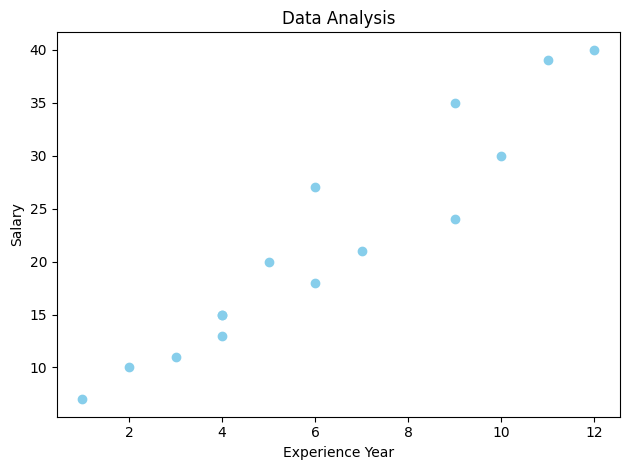

In [82]:
plt.scatter(data["Experience_Year"], data["Salary"], color="skyblue")
plt.title("Data Analysis")
plt.xlabel("Experience Year")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

In [83]:
X = data[["Experience_Year"]]
y = data["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
print(f"Slope w: {model.coef_[0]:.2f}")
print(f"Bias b: {model.intercept_:.2f}")

Slope w: 2.92
Bias b: 3.47


In [85]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is: {mse:.2f}")
print(f"R^2 Score is: {r2:.2f}")

MSE is: 6.82
R^2 Score is: 0.95


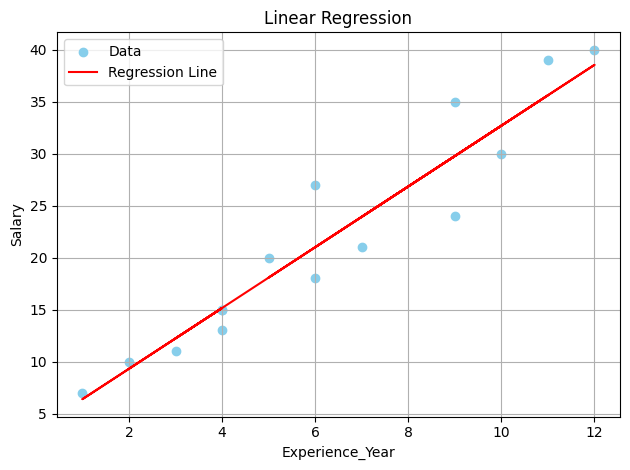

In [86]:
plt.scatter(X, y , color="skyblue", label="Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.title("Linear Regression")
plt.xlabel("Experience_Year")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [87]:
experience_year = 8
predicted_salary = model.predict([[experience_year]])
print(f"{predicted_salary[0]:.2f}")

26.85


c:\Users\TUAN NGOC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
new_data = pd.DataFrame({
    "Experience_Year": [2, 11, 3, 11, 2, 12, 3, 8, 2, 9, 3, 12, 8, 4, 6, 5],
    "Salary": [39, 14, 34, 19, 40, 22, 31, 19, 10, 29, 12, 40, 25, 14, 16, 14]
})

data_noisy = pd.concat([data, new_data], ignore_index=True)
print(data_noisy.tail())

    Experience_Year  Salary
28               12      40
29                8      25
30                4      14
31                6      16
32                5      14


In [89]:
X = data_noisy[["Experience_Year"]]
y = data_noisy["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


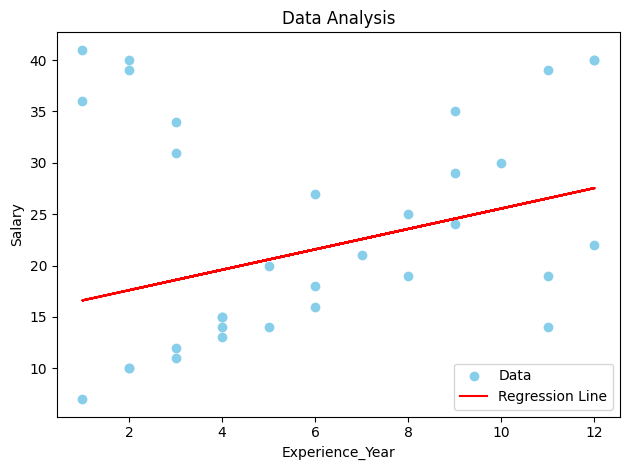

In [90]:
plt.scatter(X, y, color="skyblue", label="Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.title("Data Analysis")
plt.xlabel("Experience_Year")
plt.ylabel("Salary")
plt.legend()
plt.tight_layout()
plt.show()

In [91]:
print(f"Slope w: {model.coef_[0]:.2f}")
print(f"Bias b: {model.intercept_:.2f}")

Slope w: 0.99
Bias b: 15.61


In [92]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is: {mse:.2f}")
print(f"R^2 Score is: {r2:.2f}")

MSE is: 200.44
R^2 Score is: -1.47


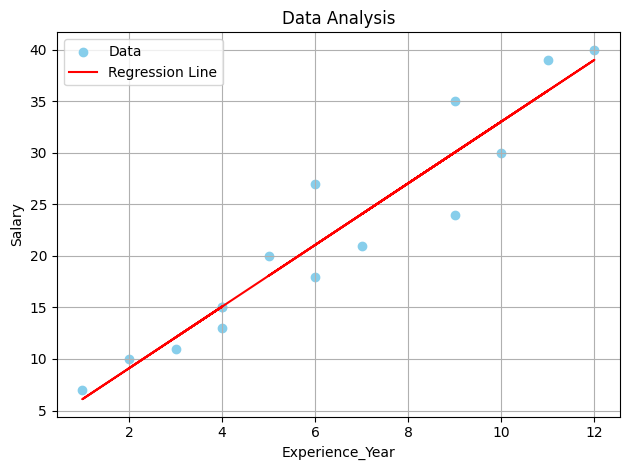

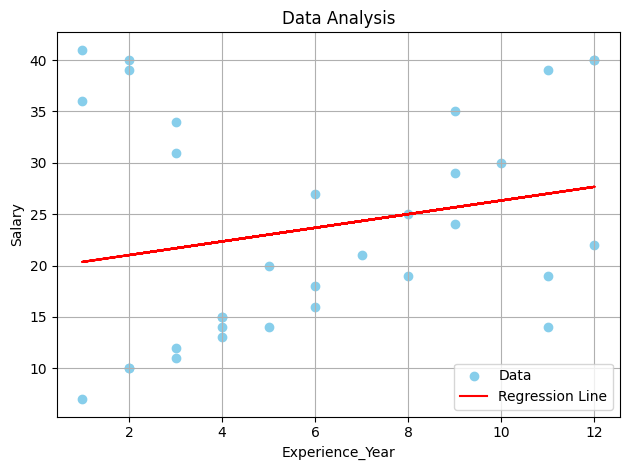

In [93]:
original_data = pd.read_csv("salary_data.csv", skipinitialspace=True)

data_noisy = pd.concat([data, new_data], ignore_index=True)

def plot_model(input_data, title):
    X = input_data[["Experience_Year"]]
    y = input_data["Salary"]

    model = LinearRegression()
    model.fit(X, y)

    plt.scatter(X, y, color="skyblue", label="Data")
    plt.plot(X, model.predict(X), color="red", label="Regression Line")
    plt.title("Data Analysis")
    plt.xlabel("Experience_Year")
    plt.ylabel("Salary")
    plt.grid((True))
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_model(original_data, "Data Before Confusion")
plot_model(data_noisy, "Data After Confusion")

In [94]:
z_score = zscore(data_noisy[["Experience_Year", "Salary"]])
outliers = (abs(z_score) > 2.5).any(axis=1)
print(data_noisy[outliers])

Empty DataFrame
Columns: [Experience_Year, Salary]
Index: []


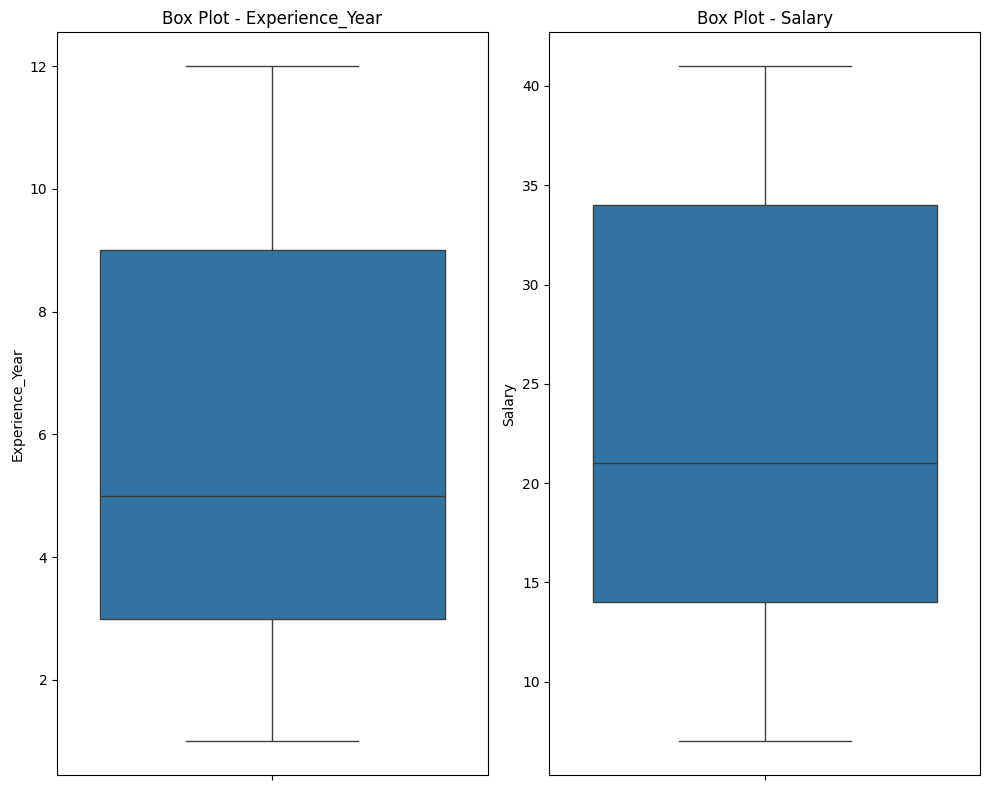

In [95]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.boxplot(y=data_noisy["Experience_Year"])
plt.title("Box Plot - Experience_Year")

plt.subplot(1, 2, 2)
sns.boxplot(y=data_noisy["Salary"])
plt.title("Box Plot - Salary")

plt.tight_layout()
plt.show()

In [96]:
mean_exp_year = data_noisy["Experience_Year"].mean()
std_exp_year = data_noisy["Experience_Year"].std()

data_noisy["Z_exp_year"] = (data_noisy["Experience_Year"] - mean_exp_year) / std_exp_year
print(data_noisy["Z_exp_year"])

0    -1.077318
1    -0.530372
2    -1.350791
3    -0.530372
4    -0.803845
5    -0.530372
6     1.657413
7     0.016574
8    -0.256899
9     1.383940
10    0.836993
11    0.290047
12    0.836993
13    1.110467
14    0.016574
15   -1.077318
16    1.383940
17   -0.803845
18    1.383940
19   -1.077318
20    1.657413
21   -0.803845
22    0.563520
23   -1.350791
24   -1.350791
25   -1.077318
26    0.836993
27   -0.803845
28    1.657413
29    0.563520
30   -0.530372
31    0.016574
32   -0.256899
Name: Z_exp_year, dtype: float64


In [97]:
mean_salary = data_noisy["Salary"].mean()
std_salary = data_noisy["Salary"].std()

data_noisy["Z_salary"] = (data_noisy["Salary"] - mean_salary) / std_salary
print(data_noisy["Z_salary"])

0    -1.260743
1    -0.798471
2    -1.538107
3    -0.983380
4    -1.168289
5    -0.798471
6     1.512892
7    -0.521107
8    -0.336198
9     1.420438
10    1.050620
11   -0.243744
12    0.033620
13    0.588347
14    0.310983
15    1.420438
16   -0.890925
17    0.958165
18   -0.428653
19    1.512892
20   -0.151289
21    0.680801
22   -0.428653
23    1.143074
24    1.605347
25   -1.260743
26    0.495892
27   -1.075834
28    1.512892
29    0.126074
30   -0.890925
31   -0.706016
32   -0.890925
Name: Z_salary, dtype: float64


In [98]:
condition = (abs(data_noisy["Z_exp_year"]) > 2.5) | (abs(data_noisy["Z_salary"]) > 2.5)
outliers = data_noisy[condition]
print(outliers)

Empty DataFrame
Columns: [Experience_Year, Salary, Z_exp_year, Z_salary]
Index: []
